In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
#import matplotlib.cm as cm
#import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

import lxml.html as lh

import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

# Japan Railway Stations Traffic Statistics

In [2]:
url='https://www.jreast.co.jp/passenger/'
page = requests.get(url)
doc = lh.fromstring(page.content)
#Parse data that are stored between <tr>..</tr> of HTML
tr_elements = doc.xpath('//tr')
col=[]
i=0
#For each row, store each first element (header) and an empty list
for t in tr_elements[0]:
    i+=1
    name=t.text_content().strip()
    col.append((name,[]))
for t in tr_elements[1]:
    i+=1
    name=t.text_content().strip()
    col.append((name,[]))

col.pop(2)

for j in range(2,len(tr_elements)):
    T=tr_elements[j]
    
    if len(T)!=6:
        break
    
    i=0
    
    #Iterate through each element of the row
    for t in T.iterchildren():
        data=t.text_content().strip()
        #Append the data to the empty list of the i'th column
        col[i][1].append(data)
        #Increment i for the next column
        i+=1

In [3]:
Dict={title:column for (title,column) in col}
df_jr=pd.DataFrame(Dict)
df_jr1 = df_jr.set_axis(['Rank', 'JR_station', 'NO_Teiki', 'Teiki', 'Total','Compare'], axis=1, inplace=False)

# Top50 Japan Railway Stations

In [4]:
df_jr2=df_jr1.iloc[:50]
df_jr2

,Rank,JR_station,NO_Teiki,Teiki,Total,Compare
0,1,新宿,"372,401","416,965","789,366",1.4
1,2,池袋,"240,260","326,734","566,994",0.1
2,3,東京,"224,973","242,191","467,165",3.2
3,4,横浜,"164,975","258,675","423,651",0.8
4,5,品川,"163,942","219,499","383,442",1.3
5,6,渋谷,"178,045","192,810","370,856",0.1
6,7,新橋,"106,621","175,350","281,971",1.6
7,8,大宮,"100,395","157,713","258,108",1.2
8,9,秋葉原,"134,724","117,543","252,267",0.8
9,10,北千住,"59,277","161,626","220,903",1.4


# Ramen restaurants near Japan Railway station (500m radius)

In [5]:
def getramenVenues(names, ranks, totals):
    
    ramen_list=[]
    for name, rank, total in zip(names, ranks, totals):
        print(rank, name)
        
        geolocator = Nominatim(user_agent="ny_explorer")
        location = geolocator.geocode(name)
        lat = location.latitude
        lng = location.longitude
        
        # create the API request URL
        CLIENT_ID = 'S2PHXRYJGKLBC1QVWCHXDWSENQ2LBXC01BGDXBBQ3FNHMJII' 
        CLIENT_SECRET ='PLR5B1PBXPYJQ3N1XV5G3BISW4HPXOZHV1FFQNGTPE1DKCVQ' 
        VERSION = '20180604'
        LIMIT = 100 # limit of number of venues returned by Foursquare API
        radius = 500 # define radius
        url = 'https://api.foursquare.com/v2/venues/search?categoryId=55a59bace4b013909087cb24&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        
        # make the GET request
        results = requests.get(url).json()["response"]['venues']
        
        # return only relevant information for each nearby venue
        ramen_list.append([( 
            name,
            rank,
            total,
            v['name'], 
            v['location']['lat'], 
            v['location']['lng']) for v in results])

        
    ramen_venues = pd.DataFrame([item for ramen_list in ramen_list for item in ramen_list])
    ramen_venues.columns = ['JR_station',
                  'Rank',
                  'Total Traffic',
                  'Restaurant', 
                  'Latitude', 
                  'Longitude']
    return(ramen_venues)

In [11]:
restaurant_ramen=getramenVenues(names=df_jr2['JR_station'],ranks=df_jr2['Rank'],totals=df_jr2['Total'])

1 新宿
2 池袋
3 東京
4 横浜
5 品川
6 渋谷
7 新橋
8 大宮
9 秋葉原
10 北千住
11 川崎
12 高田馬場
13 上野
14 大崎
15 有楽町
16 立川
17 浜松町
18 田町
19 中野
20 恵比寿
21 蒲田
22 吉祥寺
23 五反田
24 西船橋
25 船橋
26 武蔵小杉
27 柏
28 目黒
29 日暮里
30 国分寺
31 戸塚
32 町田
33 藤沢
34 千葉
35 神田
36 御茶ノ水
37 大井町
38 錦糸町
39 津田沼
40 西日暮里
41 大船
42 松戸
43 三鷹
44 四ツ谷
45 赤羽
46 大森
47 浦和
48 飯田橋
49 仙台
50 荻窪


In [12]:
print(restaurant_ramen.shape)
restaurant_ramen.head()

(1246, 6)


,JR_station,Rank,Total Traffic,Restaurant,Latitude,Longitude
0,新宿,1,"789,366",Mansei Menten (万世麺店),35.692111,139.699587
1,新宿,1,"789,366",Kitakata Ramen Ban Nai (喜多方ラーメン 坂内),35.692691,139.699560
2,新宿,1,"789,366",1/2PPUDO,35.691365,139.701080
3,新宿,1,"789,366",Ichiran (一蘭),35.690597,139.702826
4,新宿,1,"789,366",Mouko Tanmen Nakamoto (蒙古タンメン中本),35.695727,139.698164


# Number of Ramen restaurants near Japan Railway station in 500m radius

In [13]:
restaurant_ramen['Rank'] = restaurant_ramen['Rank'].astype(int)
group=restaurant_ramen.groupby(['Rank','JR_station']).count()
group=group.drop(['Total Traffic', 'Latitude','Longitude'], axis=1)
group

,,Restaurant
Rank,JR_station,
1,新宿,50
2,池袋,50
3,東京,7
4,横浜,49
5,品川,18
6,渋谷,50
7,新橋,3
8,大宮,49
9,秋葉原,50


# Explore the relationship between daily traffic and number of ramen restaurants

In [15]:
ramen_merge=pd.merge(df_jr2, group, on='JR_station')
ramen_merge

,Rank,JR_station,NO_Teiki,Teiki,Total,Compare,Restaurant
0,1,新宿,"372,401","416,965","789,366",1.4,50
1,2,池袋,"240,260","326,734","566,994",0.1,50
2,3,東京,"224,973","242,191","467,165",3.2,7
3,4,横浜,"164,975","258,675","423,651",0.8,49
4,5,品川,"163,942","219,499","383,442",1.3,18
5,6,渋谷,"178,045","192,810","370,856",0.1,50
6,7,新橋,"106,621","175,350","281,971",1.6,3
7,8,大宮,"100,395","157,713","258,108",1.2,49
8,9,秋葉原,"134,724","117,543","252,267",0.8,50
9,10,北千住,"59,277","161,626","220,903",1.4,32


In [16]:
viz = ramen_merge[['Rank','Restaurant','Compare']]

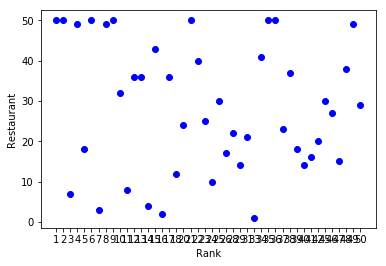

In [17]:
plt.scatter(ramen_merge.Rank, ramen_merge.Restaurant,  color='blue')
plt.xlabel("Rank")
plt.ylabel("Restaurant")
plt.show()

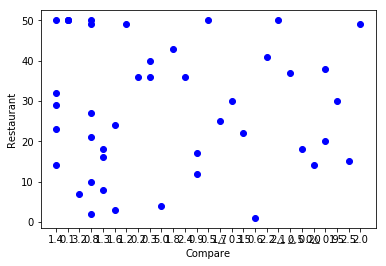

In [18]:
plt.scatter(ramen_merge.Compare, ramen_merge.Restaurant,  color='blue')
plt.xlabel("Compare")
plt.ylabel("Restaurant")
plt.show()

# Map of Ramen Restaurant in top50 Japan Railway stations

In [21]:
# create map of ramen restaurants
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode('Tokyo, JP')
latitude = location.latitude
longitude = location.longitude

map_ramen = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for restaurant, lat, lng, JR_station in zip(restaurant_ramen['Restaurant'],restaurant_ramen['Latitude'], restaurant_ramen['Longitude'],restaurant_ramen['JR_station']):
    label = '{}'.format(JR_station)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_ramen)  
    
map_ramen